In [30]:
import numpy as np
import pickle 
from utils import *
from model import *
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import metrics
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D, Dropout
from keras import metrics
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix
import pickle
import matplotlib.pyplot as plt
import numpy as np 


In [32]:
# import zipfile
# with zipfile.ZipFile('./Acc_reg.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

In [3]:
def sorter(dataset1, legend1 = None, dataset2 = None, legend2 = None, dataset3 = None, legend3 = None, model = ''):
    
    if type(dataset3) == list:
        
        yyy = []
        xxx = []

        for i in range(len(dataset3)):
            xxx.append(dataset3[i][1])
        xxx = sorted(xxx)


        for i in xxx:
            for j in range(len(dataset3)):
                if dataset3[j][1]  == i:
                    yyy.append(dataset3[j][0])
    
        
    if type(dataset2) == list:
        
        yy = []
        xx = []

        for i in range(len(dataset2)):
            xx.append(dataset2[i][1])
        xx = sorted(xx)


        for i in xx:
            for j in range(len(dataset2)):
                if dataset2[j][1]  == i:
                    yy.append(dataset2[j][0])
    
    
    
    
    y = []
    x = []

    for i in range(len(dataset1)):
        x.append(dataset1[i][1])
    x = sorted(x)


    for i in x:
        for j in range(len(dataset1)):
            if dataset1[j][1]  == i:
                y.append(dataset1[j][0])

   
        
    fig = plt.figure(figsize = (10,8))
    plt.plot(x,y, linestyle = '--', marker = 'o', label = legend1)
    if type(dataset2) == list:
            plt.plot(xx,yy, linestyle = '--', marker = 'o', label = legend2)
            plt.legend()
            
    if type(dataset3) == list:
            plt.plot(xxx,yyy, linestyle = '--', marker = 'o', label = legend3)
            plt.legend()
    
   
    plt.title(model)
    plt.xlabel('SNR [dB]')
    plt.ylabel('Accuracy [%]')
    plt.grid()
    plt.show()

In [4]:
with open('./Results2/robust.pkl', 'rb') as file:
    robust = pickle.load(file, encoding = 'Latin')
with open('./Results2/resnet.pkl', 'rb') as file:
    resnet = pickle.load(file, encoding = 'Latin')
with open('./Results2/CLDNN.pkl', 'rb') as file:
    CLDNN = pickle.load(file, encoding = 'Latin')

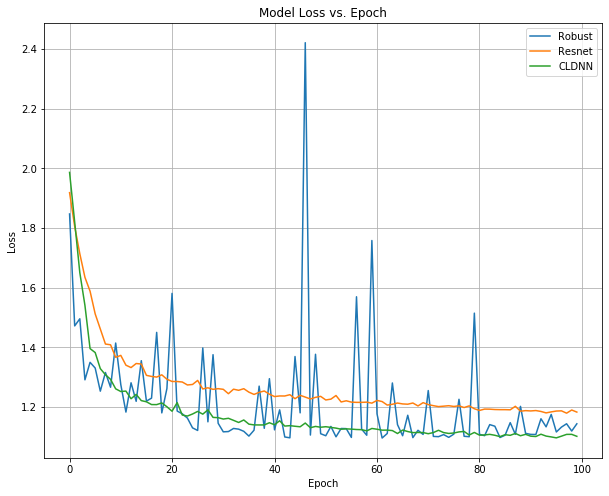

In [5]:
fig = plt.figure(figsize = (10,8))
plt.plot(robust['val_loss'], label = 'Robust')
plt.plot(resnet['val_loss'], label = 'Resnet')
plt.plot(CLDNN['val_loss'][0:100], label = 'CLDNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss vs. Epoch')
plt.legend()
plt.grid()
plt.show()

In [6]:
with open('./Results2/accuracy_results', 'rb') as file:
    CLDNN = pickle.load(file, encoding = 'Latin')
    
with open('./Results2/accuracy_results-A', 'rb') as file:
    Resnet = pickle.load(file, encoding = 'Latin')
    
with open('./Results2/batch.pkl', 'rb') as file:
    Robust_batch = pickle.load(file, encoding = 'Latin')
    
with open('./Results2/batch2.pkl', 'rb') as file:
    Robust_batch2 = pickle.load(file, encoding = 'Latin')
    
with open('./Results2/drop3.pkl', 'rb') as file:
    Robust_drop3 = pickle.load(file, encoding = 'Latin')
    
with open('./Results2/drop4.pkl', 'rb') as file:
    Robust_drop5 = pickle.load(file, encoding = 'Latin')


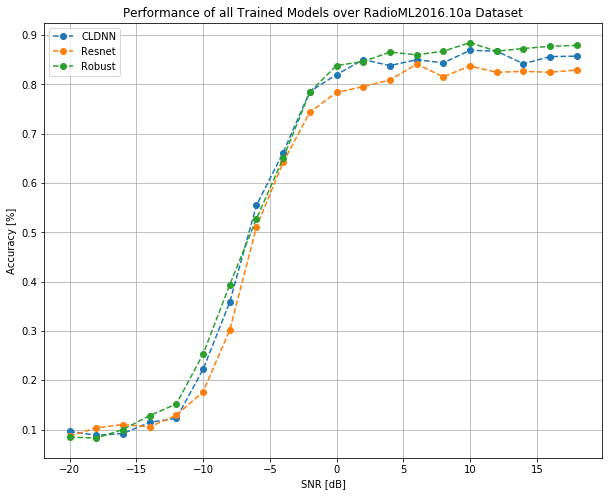

In [10]:
sorter(CLDNN, 'CLDNN', Resnet, 'Resnet', Robust_batch2, 'Robust', model = 'Performance of all Trained Models over RadioML2016.10a Dataset')

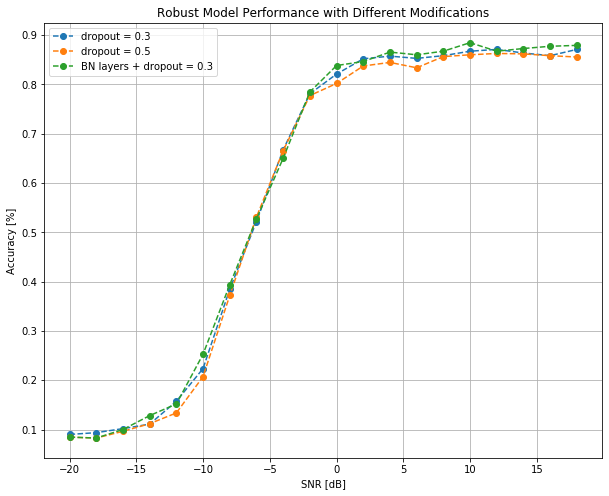

In [11]:
sorter( Robust_drop3, 'dropout = 0.3', Robust_drop5, 'dropout = 0.5', Robust_batch2, 'BN layers + dropout = 0.3', model = 'Robust Model Performance with Different Modifications')

In [13]:
with open ('./class_dict' , 'rb') as file:
    classes = pickle.load(file, encoding ='latin')

In [15]:
with open('./Results/history_reg/SNR_8_history.pkl', 'rb') as file:
    history = pickle.load(file, encoding = 'latin')

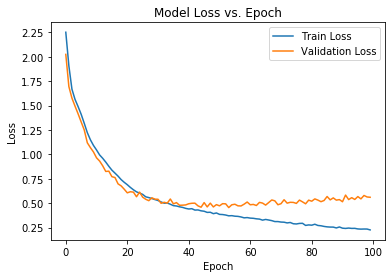

In [17]:
plt.plot(history['loss'], label = 'Train Loss')
plt.plot(history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss vs. Epoch')
plt.legend()

plt.show()

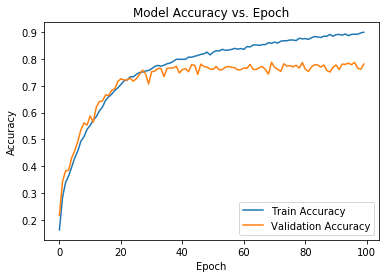

In [18]:
plt.plot(history['accuracy'], label = 'Train Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Epoch')
plt.legend()

plt.show()

In [27]:
with open('./Results/history_reg/SNR_8_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')

In [28]:
y_pred = y['1']
y_true = y['2']

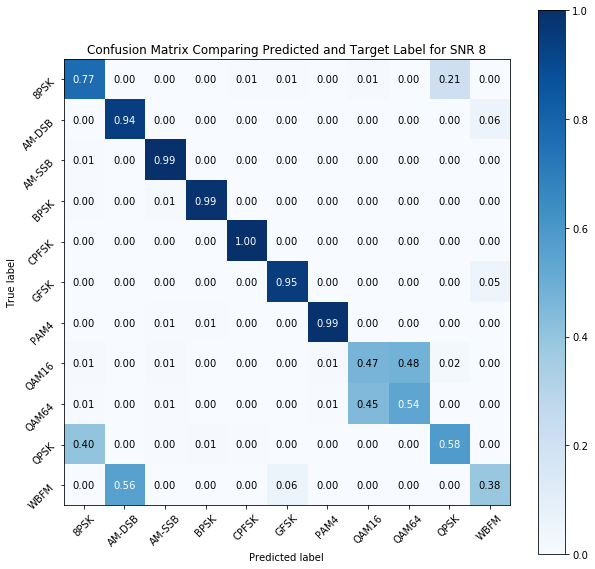

In [29]:
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR 8'
confusion_matrix_create(y_true, y_pred, classes, title)